In [16]:
import numpy as np
import matplotlib.pyplot as plt
from quantum_tunneling.workflows import run_bound_states, run_wkb_slice, run_field_scan
from quantum_tunneling.viz import plot_turning_points
from quantum_tunneling.fields import apply_field

In [17]:
# Config: reuse potentials; pick state index and field strength for slice.
potentials = {
    "cusp": {"kind": "cusp", "params": {"V0": 1.0, "alpha": 0.5}},
    "exp_well": {"kind": "exp_well", "params": {"V0": 5.0, "a": 1.0}},
    "soft_barrier": {"kind": "soft_barrier", "params": {"V0": 5.0}},
    "rough": {"kind": "rough", "params": {"V0": 1.0, "k0": 0.6, "levels": 4, "decay": 0.6}},
}
pot_key = "cusp"
state_index = 0
F_slice = 0.02
cfg = {
    "potential": potentials[pot_key],
    "grid": {"L": 10.0, "N": 1200},
    "solver": {"k": 6, "hbar": 1.0, "m": 1.0},
    "F_max": 0.4,
    "F_steps": 16,
}
cfg

{'potential': {'kind': 'cusp', 'params': {'V0': 1.0, 'alpha': 0.5}},
 'grid': {'L': 10.0, 'N': 1200},
 'solver': {'k': 6, 'hbar': 1.0, 'm': 1.0},
 'F_max': 0.4,
 'F_steps': 16}

In [18]:
res = run_bound_states(cfg)
wkb_slice = run_wkb_slice(cfg, res, state_index=state_index, F=F_slice)
wkb_slice

{'barrier': False, 'message': 'No closed barrier (likely over-the-barrier).'}

In [19]:
if wkb_slice.get("barrier"):
    x = res['x']
    Vtilt = apply_field(res['Vx'], x, F_slice)
    tps = np.array(wkb_slice['turning_points'])
    plot_turning_points(x, Vtilt, res['E'][state_index], tps)
    plt.show()
else:
    print(wkb_slice.get('message', 'no barrier'))

No closed barrier (likely over-the-barrier).


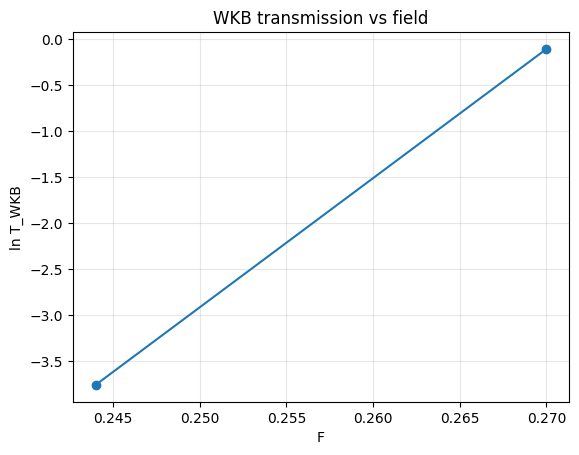

[(0.01, 'not_over_the_barrier or turning_point_out_of_range'),
 (0.036000000000000004, 'not_over_the_barrier or turning_point_out_of_range'),
 (0.062000000000000006, 'not_over_the_barrier or turning_point_out_of_range'),
 (0.08800000000000001, 'not_over_the_barrier or turning_point_out_of_range'),
 (0.114, 'not_over_the_barrier or turning_point_out_of_range'),
 (0.14, 'not_over_the_barrier or turning_point_out_of_range'),
 (0.16600000000000004, 'not_over_the_barrier or turning_point_out_of_range'),
 (0.19200000000000003, 'not_over_the_barrier or turning_point_out_of_range'),
 (0.21800000000000003, 'not_over_the_barrier or turning_point_out_of_range'),
 (0.24400000000000002, 'not_over_the_barrier'),
 (0.27, 'not_over_the_barrier'),
 (0.29600000000000004, 'not_over_the_barrier or turning_point_out_of_range'),
 (0.32200000000000006, 'not_over_the_barrier or turning_point_out_of_range'),
 (0.34800000000000003, 'not_over_the_barrier or turning_point_out_of_range'),
 (0.37400000000000005, 'n

In [20]:
scan = run_field_scan(cfg, res, state_index=state_index)
records = scan['records']
F_vals = [r['F'] for r in records]
lnT = [np.log(r['T']) if 'T' in r else np.nan for r in records]
plt.figure()
plt.plot(F_vals, lnT, marker='o')
plt.xlabel('F')
plt.ylabel('ln T_WKB')
plt.title('WKB transmission vs field')
plt.grid(True, alpha=0.3)
plt.show()
[(r['F'], r['status']) for r in records]

## Notes
- If `status` switches to over-the-barrier, WKB no longer applies.
- Compare ln T slopes across potentials and excited states (change `state_index`).
- Use turning-point spacing to discuss curvature vs cusp behavior.